In [1]:
import os
import numpy as np
import networkx as nx
from tqdm import tqdm
from matplotlib import animation
from matplotlib import pyplot as plt

# To have the Matplotlib plots centered in the notebook
from IPython.core.display import HTML
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
    </style>
    """)

In [2]:
# Create a Barabasi-Albert Network
# 15 Nodes
#  2 Degree
brb = nx.generators.random_graphs.barabasi_albert_graph(15, 2)

In [3]:
def animate(num, G, ax, pos):
    ax.clear()
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-1.1, 1.1)

    index = range(num)
    H = G.subgraph(index)
    new_pos = {coor:pos[coor] for coor in index}
    nx.draw(H, pos=new_pos, ax=ax, with_labels=True, node_color='deepskyblue', font_color="whitesmoke")

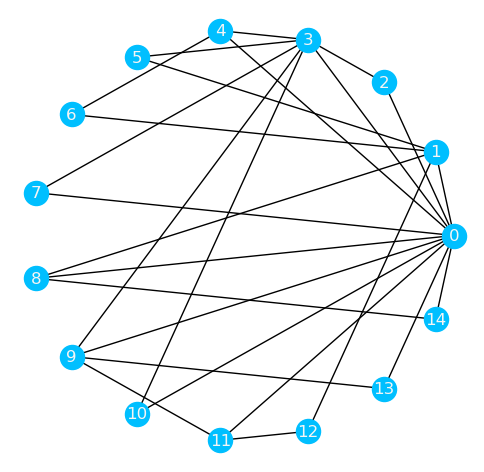

In [4]:
# Build plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

# Network base-end values
n_nodes = brb.number_of_nodes()
pos = nx.circular_layout(brb)

# Make Animation
ani = animation.FuncAnimation(fig, animate, frames=range(1, n_nodes+1),
                                interval=500, fargs=(brb, ax, pos))

# Save Animation as a GIF
folder_path = os.path.join(os.path.abspath(''), '..', 'Reports', 'Figures')
filename = os.path.join(folder_path, 'barabasi.gif')
ani.save(filename, writer='pillow')

plt.show()